In [2]:
%matplotlib inline
import gdal
import numpy as np
from matplotlib.pyplot import imread
import numpy as np
from skimage import io
import scipy.stats
import os
import seaborn as sns
#img = io.imread('image.png', as_gray=True)
import pandas as pd
import matplotlib.pyplot as plt
input_path100_7="E:/Thesis/Data/roads_100_7_CVG/"
input_path50_7="E:/Thesis/Data/roads_50_7_CVG/"
table={}
table['spearmanrC']=list()
table['ran']=list()

In [3]:
t1={}
t1['range']=list()
for i in range(-100,101,1):
    t1['range'].append(i*0.01)
print(t1['range'])


[-1.0, -0.99, -0.98, -0.97, -0.96, -0.9500000000000001, -0.9400000000000001, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.8300000000000001, -0.8200000000000001, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7000000000000001, -0.6900000000000001, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.5700000000000001, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47000000000000003, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41000000000000003, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35000000000000003, -0.34, -0.33, -0.32, -0.31, -0.3, -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 

In [4]:
def TestAndAppend(Image_x,Image_y):
    SC,SP=scipy.stats.spearmanr(Image_x, Image_y, axis=None)
    table['spearmanrC'].append(SC)
    if(np.isnan(SC)):
        table['ran'].append(-2.0)
    else:
        for j in range (202):
            if(SC<t1['range'][j]):
                table['ran'].append((t1['range'][j]))
                break

In [5]:
def DF(table):
    df=pd.DataFrame.from_dict(table)
    print(df.shape)
    print(df.describe())
    print(df.head())
    return df
def HIST_null(df):
    df.ran.hist()
    df1=df.groupby('ran').size().reset_index(name='Size')
    return df1
def HIST(df):
    df=df.drop(df.index[0])
    df.ran.hist()
    return df


In [6]:
def TEST(x,y,z,input_path):
    for i in range(0,y,x):
         for j in range(0,z,x):
            Image_x  = io.imread(input_path+"tile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            Image_y = io.imread(input_path+"gtile_"+str(i)+"_"+str(j)+".tif",as_gray=True)
            TestAndAppend(Image_x,Image_y)

In [7]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(50,1101,1401,input_path50_7)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ASUS\anaconda3\envs\TensorFlow-GPU\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(667, 2)
       spearmanrC         ran
count  316.000000  667.000000
mean     0.127925   -0.989535
std      0.237515    1.078204
min     -0.250804   -2.000000
25%     -0.040829   -2.000000
50%      0.068642   -2.000000
75%      0.228398    0.060000
max      1.000000    1.000000
   spearmanrC   ran
0         NaN -2.00
1         NaN -2.00
2    0.343933  0.35
3    0.175825  0.18
4    0.636327  0.64


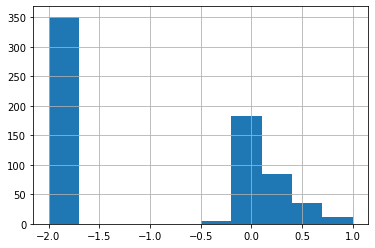

In [8]:
#df.pearsonrC.hist()
df=DF(table)
df51_7=HIST_null(df)

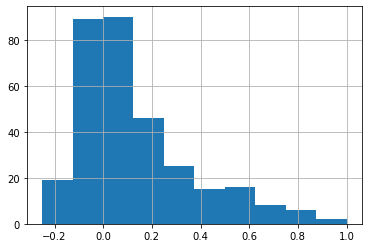

In [9]:
df.spearmanrC.hist()

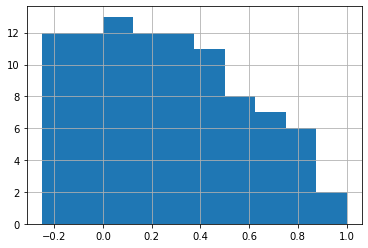

In [10]:
df52_7=HIST(df51_7)


In [11]:
table['spearmanrC'].clear()
table['ran'].clear()
TEST(100,1101,1401,input_path100_7)

(180, 2)
       spearmanrC         ran
count  104.000000  180.000000
mean     0.165676   -0.745889
std      0.213917    1.087337
min     -0.130878   -2.000000
25%      0.004455   -2.000000
50%      0.124121   -0.035000
75%      0.266462    0.140000
max      0.803735    0.810000
   spearmanrC   ran
0    0.420285  0.43
1    0.028923  0.03
2    0.510916  0.52
3    0.650470  0.66
4    0.106679  0.11


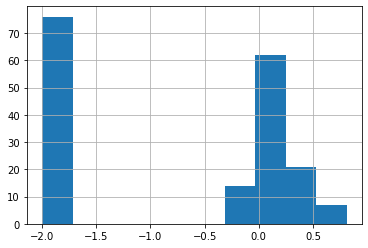

In [12]:
df100_7=DF(table)
df101_7=HIST_null(df100_7)

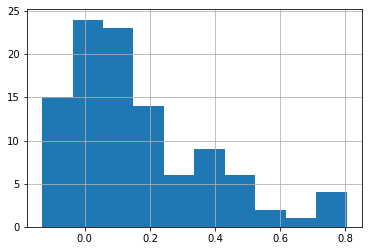

In [13]:
df100_7.spearmanrC.hist()

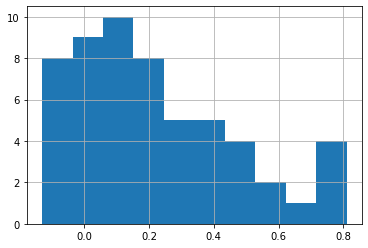

In [14]:
df102_7=HIST(df101_7)


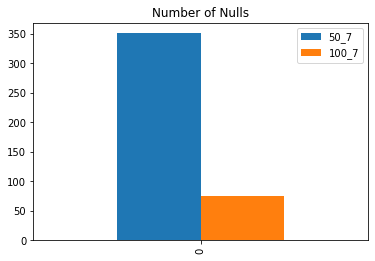

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
a=df51_7['Size'].iloc[0]
c=df101_7['Size'].iloc[0]
d =[ {
  "50_7": a,
  "100_7":c,

}]
pd.DataFrame(d, index=[0]).plot(kind='bar')
plt.title("Number of Nulls")
plt.show()

Text(0.5, 1.0, 'KDE for different Zoom level & grid')

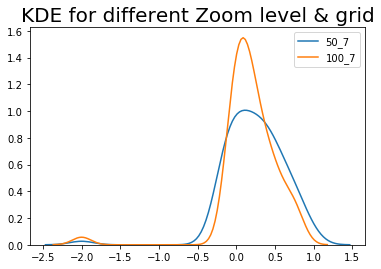

In [16]:

ay=sns.kdeplot(df51_7.ran,label="50_7")
ay=sns.kdeplot(df101_7.ran,label="100_7")
plt.title("KDE for different Zoom level & grid",fontsize = 20)

Text(0.5, 1, 'Range_Size_50_7')

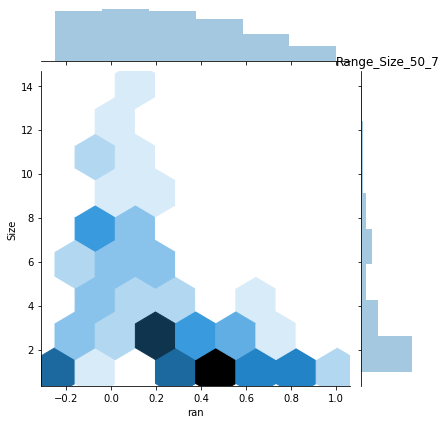

In [17]:
sns.jointplot(x='ran',y='Size',data=df52_7,kind='hex')
plt.title("Range_Size_50_7")

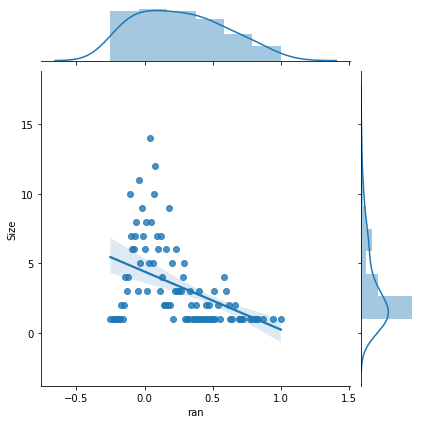

In [18]:
sns.jointplot(x='ran',y='Size',data=df52_7,kind='reg')


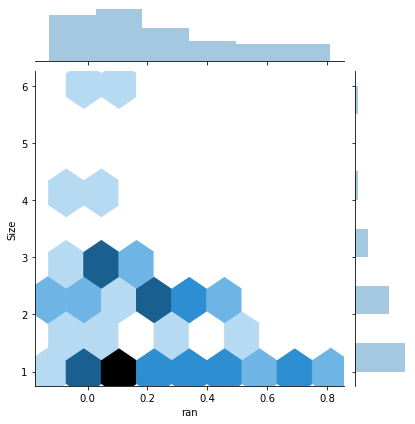

In [19]:
sns.jointplot(x='ran',y='Size',data=df102_7,kind='hex')

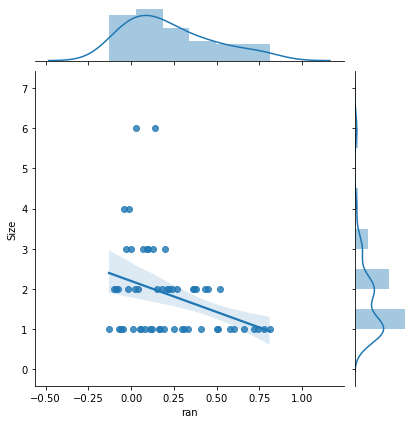

In [20]:
sns.jointplot(x='ran',y='Size',data=df102_7,kind='reg')

Text(0.5, 1.0, 'Range_Size_50_7')

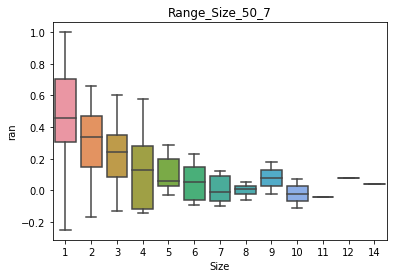

In [21]:
sns.boxplot('Size','ran',data=df52_7)
plt.title("Range_Size_50_7")

Text(0.5, 1.0, 'Range_Size_100_7')

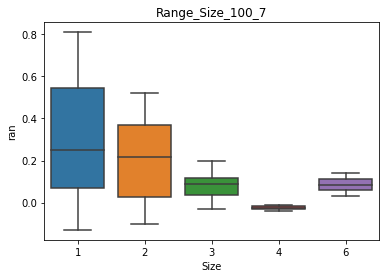

In [22]:
sns.boxplot('Size','ran',data=df102_7)
plt.title("Range_Size_100_7")



